<a href="https://colab.research.google.com/github/gbsv25/Estudo-de-Probabilidade-Correlacao-e-Regressao-no-ENEM-2019/blob/main/correlacao_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **ANÁLISE DE CORRELAÇÃO E REGRESSÃO LINEAR**

Este código realiza uma análise estatística exploratória, focando na relação entre as notas do ENEM.

Ele inclui:
1. Cálculo da matriz de correlação para identificar relações entre variáveis.
2. Visualizações gráficas da correlação (heatmap, scatter plots).
3. Construção de um modelo de regressão linear para prever a nota final baseada na nota de redação.
4. Testes de normalidade e avaliação dos resíduos da regressão.


In [63]:
import numpy as np  # Biblioteca para manipulação de arrays e operações matemáticas
import pandas as pd  # Biblioteca para análise e manipulação de dados
import seaborn as sns  # Biblioteca para visualização de dados estatísticos
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos
import scipy.stats as stats  # Biblioteca estatística para testes de hipóteses
import statsmodels.formula.api as smf  # Biblioteca para modelagem estatística

In [64]:
# Conectar ao Google Drive para acessar os dados
from google.colab import drive
# Montando o drive para acessar arquivos salvos no Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
# Carregando o dataset do ENEM 2019 já tratado
enem_sp = pd.read_csv('/content/drive/MyDrive/projetos portifólio/enem_2019_tratado.csv',
                      sep=',', encoding='iso-8859-1')

In [66]:
# Filtrando os dados para um colégio específico através do código da escola
colegiox = enem_sp.loc[enem_sp.CO_ESCOLA == 35017632.0]

In [67]:
# Verificando o tamanho do subconjunto filtrado (número de alunos e colunas)
print(colegiox.shape)

(41, 29)


In [68]:
# Lista das colunas que representam as notas das diferentes áreas do conhecimento
notas = ['NOTA_CN', 'NOTA_CH', 'NOTA_MT', 'NOTA_LC', 'NOTA_REDACAO']

In [69]:
# Criando uma nova coluna que representa a média das notas de cada aluno
colegiox.loc[:, 'nota_final'] = colegiox[notas].mean(axis=1)

<ipython-input-69-b2ab3bd56c8e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
# Exibindo as primeiras linhas do DataFrame após a adição da nova coluna
print(colegiox.head())

   NU_INSCRICAO NO_MUNICIPIO_RESIDENCIA  IDADE SEXO  TP_ESTADO_CIVIL    RACA  \
37     1,90E+11        Águas de Lindóia     18    M                1  branca   
44     1,90E+11        Águas de Lindóia     17    F                1   parda   
52     1,90E+11        Águas de Lindóia     17    F                1  branca   
65     1,90E+11        Águas de Lindóia     17    M                1   parda   
79     1,90E+11        Águas de Lindóia     18    F                1  branca   

    TP_NACIONALIDADE  TP_ST_CONCLUSAO   ESCOLA  IN_TREINEIRO  ...  TP_LINGUA  \
37                 1                2  pública             0  ...     Inglês   
44                 1                2  pública             0  ...     Inglês   
52                 1                2  pública             0  ...   Espanhol   
65                 1                2  pública             0  ...     Inglês   
79                 1                2  pública             0  ...   Espanhol   

   TP_STATUS_REDACAO  COMP1  COMP2  CO

In [71]:
# Criando um novo DataFrame apenas com as colunas de notas e a nota final
notas_colegiox = colegiox[notas + ['nota_final']]

### Gráfico correlação

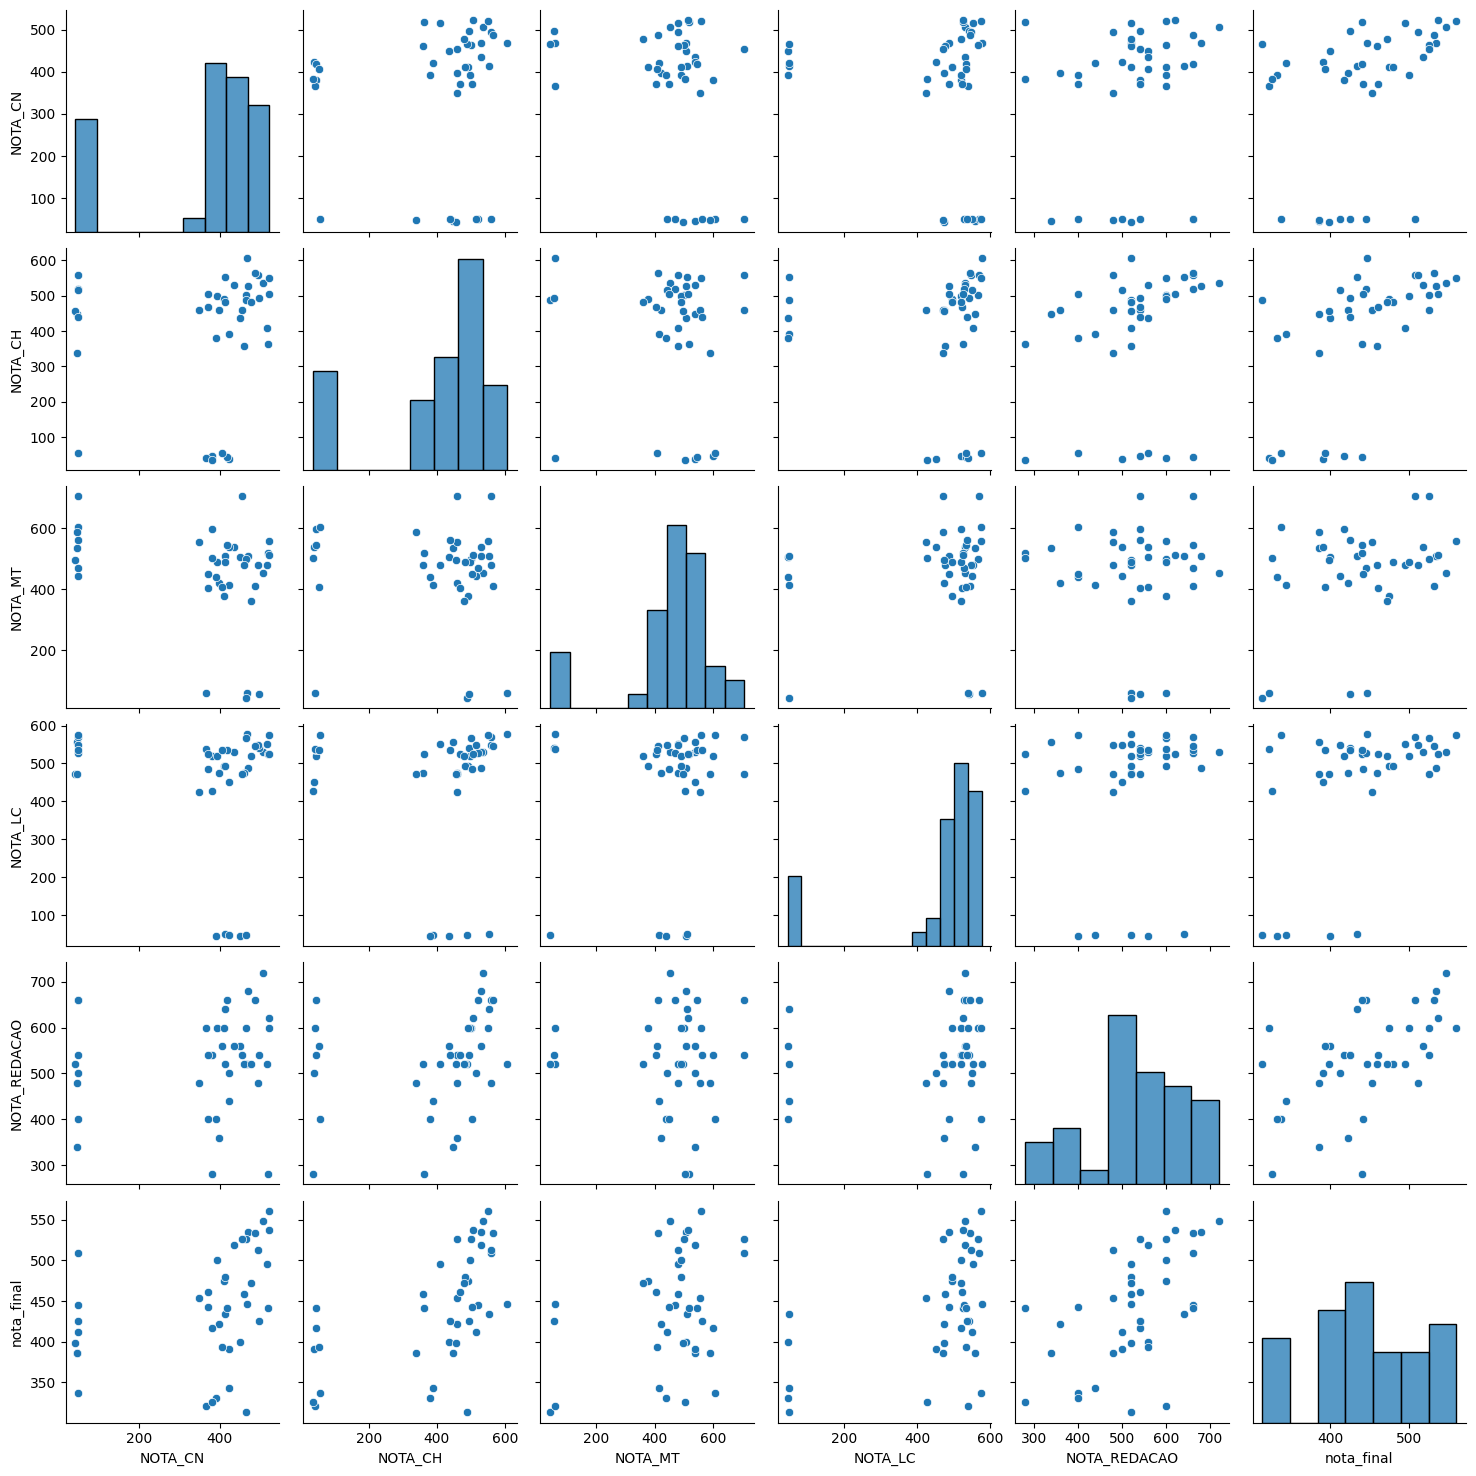

In [72]:
# Criando gráficos de dispersão entre todas as notas para visualizar correlações
sns.pairplot(notas_colegiox)
plt.show()

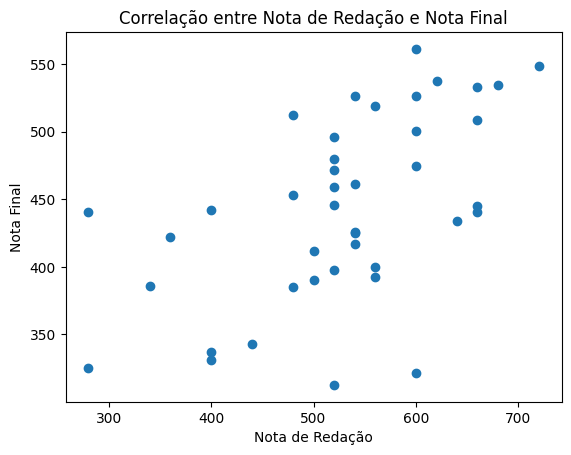

In [73]:
# Criando um gráfico de dispersão específico entre Nota de Redação e Nota Final
plt.scatter(notas_colegiox.NOTA_REDACAO, notas_colegiox.nota_final)
plt.title('Correlação entre Nota de Redação e Nota Final')
plt.xlabel('Nota de Redação')
plt.ylabel('Nota Final')
plt.grid(False)
plt.show()

In [74]:
# Calculando a matriz de correlação entre as notas
correlacoes = notas_colegiox.corr(method='spearman')
print(correlacoes)

               NOTA_CN   NOTA_CH   NOTA_MT   NOTA_LC  NOTA_REDACAO  nota_final
NOTA_CN       1.000000  0.320049 -0.206620  0.118293      0.244312    0.546864
NOTA_CH       0.320049  1.000000 -0.178841  0.336077      0.437328    0.674158
NOTA_MT      -0.206620 -0.178841  1.000000  0.022997      0.021279    0.134843
NOTA_LC       0.118293  0.336077  0.022997  1.000000      0.247201    0.352613
NOTA_REDACAO  0.244312  0.437328  0.021279  0.247201      1.000000    0.556488
nota_final    0.546864  0.674158  0.134843  0.352613      0.556488    1.000000


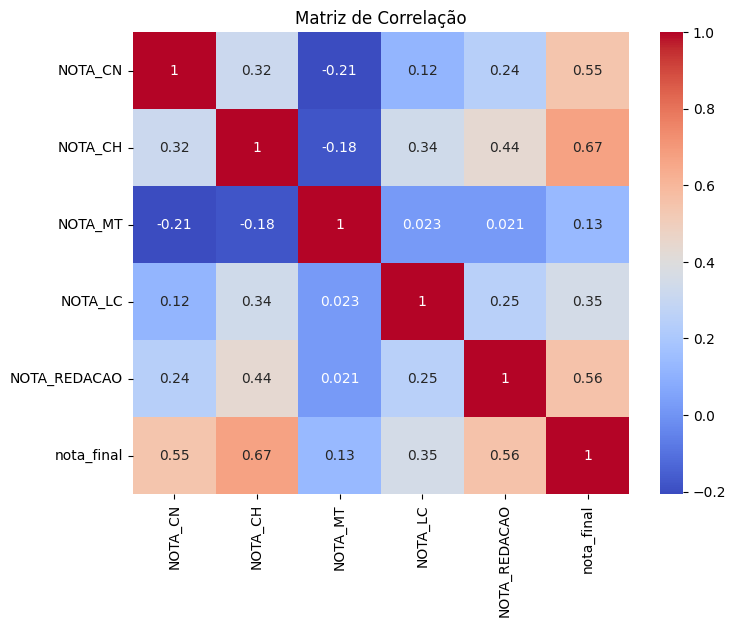

In [75]:
#Criando um mapa de calor para visualizar melhor as correlações
plt.figure(figsize=(8,6))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

### REGRESSÃO LINEAR

In [76]:
# Foi criado um modelo de regressão linear para prever a nota final com base na nota de redação
regressao = smf.ols('nota_final ~ NOTA_REDACAO', data=notas_colegiox).fit()
print(regressao.summary())


                            OLS Regression Results                            
Dep. Variable:             nota_final   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     17.02
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           0.000188
Time:                        20:54:27   Log-Likelihood:                -223.52
No. Observations:                  41   AIC:                             451.0
Df Residuals:                      39   BIC:                             454.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      251.6789     47.319      5.319   

In [77]:
# Extraindo os coeficientes da regressão
a, b = regressao.params

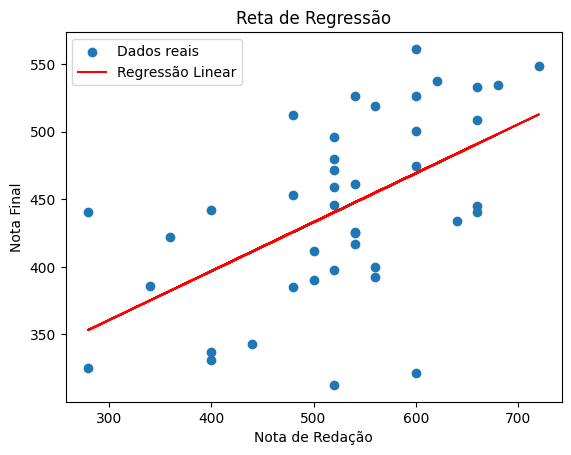

In [78]:
# Criando o gráfico da reta de regressão
plt.scatter(notas_colegiox['NOTA_REDACAO'], notas_colegiox['nota_final'], label='Dados reais')
plt.plot(notas_colegiox['NOTA_REDACAO'], a + b * notas_colegiox['NOTA_REDACAO'], color='red', label='Regressão Linear')
plt.title('Reta de Regressão')
plt.xlabel('Nota de Redação')
plt.ylabel('Nota Final')
plt.legend()
plt.show()

### Análise da Normalidade

Teste Shapiro-Wilk

Teste de normalidade das variáveis utilizando o teste de Shapiro-Wilk;

Se p > 0.05, a distribuição é normal; se p <= 0.05, não é normal.

In [79]:
variaveis = ['NOTA_REDACAO', 'nota_final', 'NOTA_MT', 'NOTA_CN', 'NOTA_LC', 'NOTA_CH']
for var in variaveis:
    stat, p = stats.shapiro(notas_colegiox[var])
    print(f'Teste de Shapiro-Wilk para {var}: estatística={stat:.8f}, p-valor={p:.8f}')

Teste de Shapiro-Wilk para NOTA_REDACAO: estatística=0.95297633, p-valor=0.08905532
Teste de Shapiro-Wilk para nota_final: estatística=0.96389372, p-valor=0.21481982
Teste de Shapiro-Wilk para NOTA_MT: estatística=0.79856803, p-valor=0.00000510
Teste de Shapiro-Wilk para NOTA_CN: estatística=0.73490304, p-valor=0.00000030
Teste de Shapiro-Wilk para NOTA_LC: estatística=0.59861772, p-valor=0.00000000
Teste de Shapiro-Wilk para NOTA_CH: estatística=0.75092634, p-valor=0.00000059


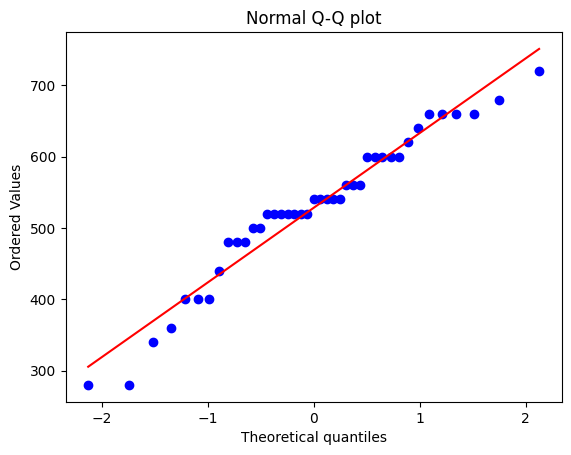

In [80]:
# Criando um gráfico QQ-Plot para verificar a normalidade visualmente
stats.probplot(notas_colegiox['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

Análise dos Outliers

In [81]:
import plotly.express as px

In [82]:
# Análise de outliers usando boxplots
import plotly.express as px
for var in variaveis:
    grafico = px.box(notas_colegiox, y=var)
    grafico.show()

## **REGRESSÃO**

### Regressão Linear com Statsmodels

In [83]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [84]:
regressao = smf.ols('nota_final ~ NOTA_REDACAO', data = notas_colegiox).fit()
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:             nota_final   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     17.02
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           0.000188
Time:                        20:54:28   Log-Likelihood:                -223.52
No. Observations:                  41   AIC:                             451.0
Df Residuals:                      39   BIC:                             454.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      251.6789     47.319      5.319   

In [85]:
# Extraindo e imprimindo os coeficientes do modelo de regressão
coefs = pd.DataFrame(regressao.params, columns=['Coeficientes'])
print(coefs)

              Coeficientes
Intercept       251.678855
NOTA_REDACAO      0.362749


Equação:

Nota Final = 251,678855 + 0,362749.Nota Redação

In [86]:
# Exibindo a equação da regressão
print(f'Equação: Nota Final = {a:.4f} + {b:.4f} * Nota de Redação')

Equação: Nota Final = 251.6789 + 0.3627 * Nota de Redação


In [87]:
notas_colegiox.head()

,NOTA_CN,NOTA_CH,NOTA_MT,NOTA_LC,NOTA_REDACAO,nota_final
37,46.3,447.2,537.1,557.3,340.0,385.58
44,505.9,534.5,451.9,529.8,720.0,548.42
52,449.4,436.4,506.4,45.8,560.0,399.60
65,468.6,606.1,59.5,576.6,520.0,446.16
79,414.3,553.7,510.6,49.5,640.0,433.62


In [88]:
regressao.predict()

array([375.01357169, 512.85825473, 454.81838819, 440.30842155,
       483.83832146, 382.268555  , 498.3482881 , 454.81838819,
       469.32835482, 440.30842155, 447.56340487, 433.05343823,
       491.09330478, 353.24862173, 440.30842155, 411.28848828,
       425.79845491, 440.30842155, 425.79845491, 447.56340487,
       491.09330478, 491.09330478, 447.56340487, 491.09330478,
       440.30842155, 469.32835482, 469.32835482, 396.77852164,
       447.56340487, 425.79845491, 396.77852164, 469.32835482,
       454.81838819, 433.05343823, 440.30842155, 353.24862173,
       469.32835482, 447.56340487, 440.30842155, 396.77852164,
       476.58333814])

In [89]:
# Calculando os resíduos do modelo e exibindo os valores
residuos = regressao.resid
residuos

,0
37,10.566428
44,35.561745
52,-55.218388
65,5.851578
79,-50.218321
84,39.811445
85,36.531712
91,63.921612
17070,57.251645
17072,-127.628422


<ipython-input-90-7460a5251079>:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



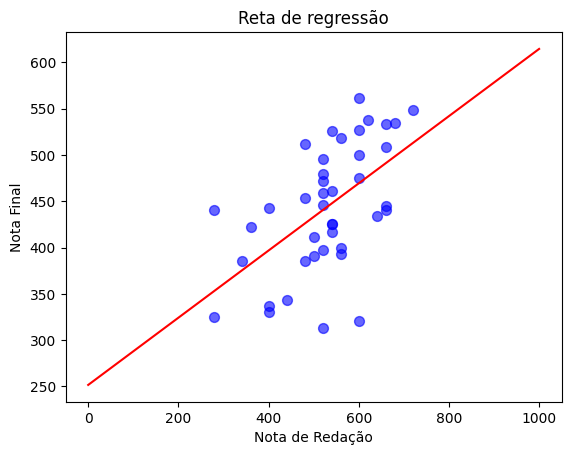

In [90]:
# X_plot = np.linspace(min(notas_colegiox.NOTA_REDACAO), max(notas_colegiox.NOTA_REDACAO), len(notas_colegiox.NOTA_REDACAO))
plt.scatter(y=notas_colegiox.nota_final, x=notas_colegiox.NOTA_REDACAO, color='blue', s=50, alpha=0.6)
X_plot = np.linspace(0, 1000)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('Nota Final')
plt.xlabel('Nota de Redação')
plt.show()

### Teste de Normalidade dos resíduos

In [91]:
# Teste de Shapiro-Wilk nos resíduos
stat, p = stats.shapiro(residuos)
print(f'Teste de Shapiro-Wilk para resíduos: estatística= {stat:.4f}, p-valor= {p:.4f}')

Teste de Shapiro-Wilk para resíduos: estatística= 0.9587, p-valor= 0.1418


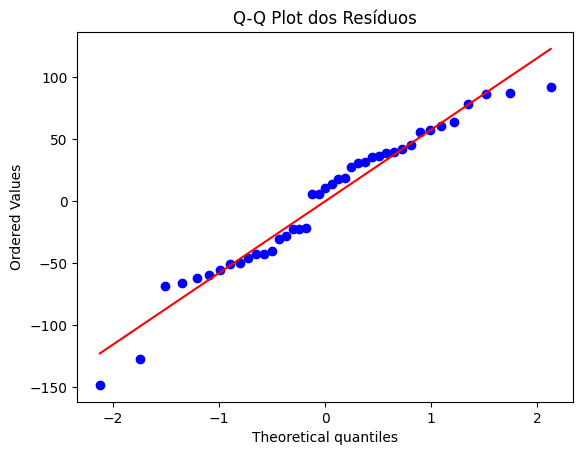

In [92]:
# Q-Q Plot dos resíduos
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot dos Resíduos")
plt.show()


### Análise da Homocedasticidade dos resíduos
(resíduos com variação constante)

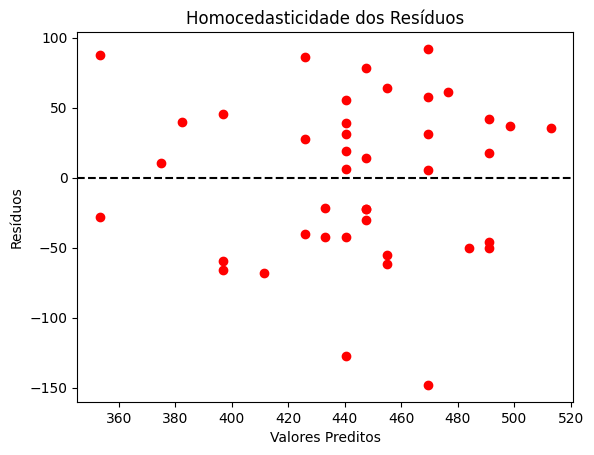

In [93]:
# A homocedasticidade significa que a variância dos resíduos deve ser constante.
plt.scatter(regressao.predict(), residuos, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Homocedasticidade dos Resíduos')
plt.show()